# single linear Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model


In [107]:
points = pd.read_csv('/content/session_1_ML_data_Linear_regression.csv')

points.head()
points.shape

(99, 2)

In [108]:
x = points[['study_Hours']]#.values
y = points[['Test_scores']]#.values

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 12,test_size = 0.3)

# x_val,x_test,y_val,y_test = train_test_split(x_test,y_test, random_state = 12,test_size = 0.5)

#  70   ,   15  ,   15
# x_train , x_val , x_test

In [110]:
# dif Model
model = linear_model.LinearRegression()
# trianing model - fit

model.fit(x_train,y_train)

# testing - predict
model.predict([[2]])

y_pred = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print('mean_squared_error = ',MSE)
print('mean_absolute_error = ',MAE)



mean_squared_error =  104.60634447364833
mean_absolute_error =  8.675494660963908


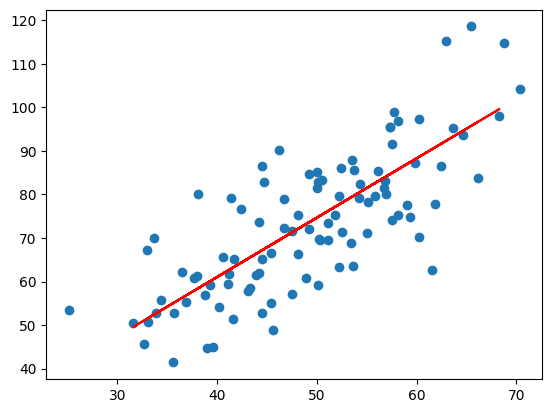

In [114]:
plt.scatter(x,y)
plt.plot(x_test,y_pred,c='r')

In [118]:
y_pred.max()

array([[74.76528365],
       [68.69682921],
       [71.23423748],
       [73.24322265],
       [64.3617015 ],
       [67.42790012],
       [73.58107647],
       [85.79370234],
       [65.56300252],
       [78.13957017],
       [93.21437962],
       [68.4258453 ],
       [72.08409741],
       [51.42512025],
       [76.14882022],
       [99.62245718],
       [51.63403439],
       [88.69388441],
       [86.99427425],
       [58.32527917],
       [87.43168887],
       [79.53603353],
       [96.72133772],
       [49.58276994],
       [62.91934524],
       [77.17936993],
       [57.87594106],
       [79.69482827],
       [84.02327279],
       [60.44016185]])

In [ ]:
x

,study_Hours,Test_scores
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


In [ ]:
import statsmodels.api as sm

x_new = sm.add_constant(x)
x_new
model = sm.OLS(y,x).fit()

prediction = model.predict(x)

model_state = model.summary()

print(model_state)

                                 OLS Regression Results                                
Dep. Variable:            Test_scores   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.681e+33
Date:                Wed, 04 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:57:52   Log-Likelihood:                          3077.8
No. Observations:                  99   AIC:                                     -6152.
Df Residuals:                      97   BIC:                                     -6146.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Multi linear Regression

In [122]:
data = pd.read_csv('cars.csv')
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [123]:
x = data [['Volume','Weight']].values
y = data['CO2'].values#.reshape(1,-1)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [125]:
MV_model = linear_model.LinearRegression()

MV_model.fit(x_train,y_train)
MV_model.predict([[1380,912]])

y_pred = MV_model.predict(x_test)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print('mean_squared_error = ',MSE)
print('mean_absolute_error = ',MAE)

mean_squared_error =  38.29805995589479
mean_absolute_error =  5.921963381386126


In [134]:
from mlxtend.evaluate import bias_variance_decomp

avg_Error, avg_bais, avg_var = bias_variance_decomp(MV_model, x_train,y_train, x_test, y_test, loss='mse', random_seed = 1)

print('Error MSE = ',avg_Error )
print('Error bais = ',avg_bais )
print('Error variance = ',avg_var )

Error MSE =  43.50729864967382
Error bais =  37.030495036406535
Error variance =  6.476803613267687


In [127]:
y_pred#[:,0]

array([ 94.74653622, 101.41040265, 102.12631379, 107.58795555,
       106.03702139, 101.14094532, 106.85596034,  93.89589641])

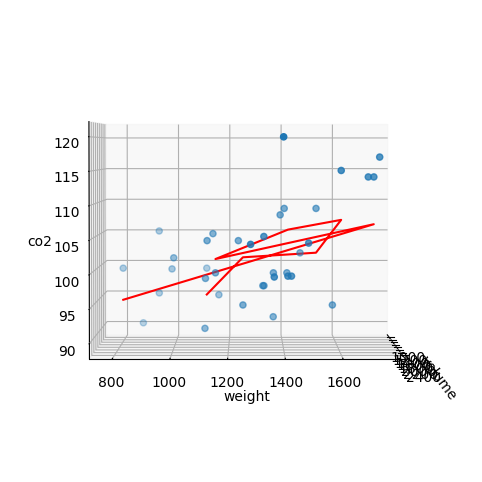

In [133]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(projection = '3d')

ax.scatter(x[:,0],x[:,1], y)

ax.plot(x_test[:,0],x_test[:,1], y_pred,c = 'r')

ax.set_xlabel('volume')
ax.set_ylabel('weight')
ax.set_zlabel('co2')

ax.view_init(2,0)

# polynomial Regression

In [135]:
data = pd.read_csv('/content/polynomial test data.csv')

data.head()

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10


In [136]:
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

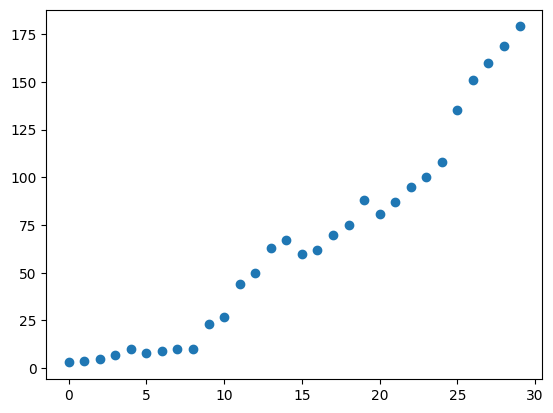

In [137]:
plt.scatter(x,y)

In [ ]:
LR_model = linear_model.LinearRegression()
LR_model.fit(x,y)
y_pred = LR_model.predict(x)

mean_squared_error =  192.28116178469918
mean_absolute_error =  12.055335558027442


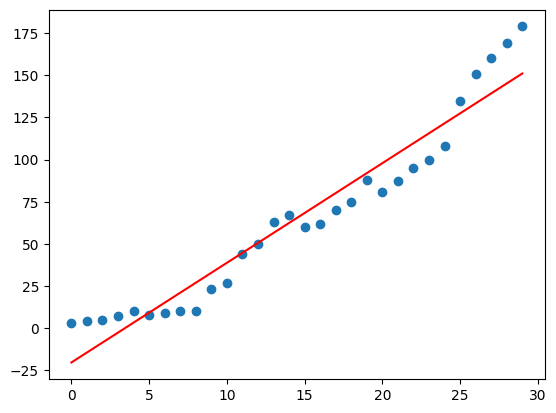

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y,y_pred)
MAE = mean_absolute_error(y,y_pred)

print('mean_squared_error = ',MSE)
print('mean_absolute_error = ',MAE)

plt.scatter(x,y)
plt.plot(x,y_pred,c='r')

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =1)

from sklearn.preprocessing import PolynomialFeatures
for i in range(1,15):

  poly_reg = PolynomialFeatures(degree =i)

  x_poly_train = poly_reg.fit_transform(x_train)
  x_poly_test = poly_reg.fit_transform(x_test)

  PL_model = linear_model.LinearRegression()
  PL_model.fit(x_poly_train,y_train)

  y_pred = PL_model.predict(x_poly_test)

  plt.scatter(x,y)

  x_grid = np.arange(min(x_test),max(x_test),0.1).reshape(-1,1)

  y_pred_plot = PL_model.predict(poly_reg.transform(x_grid))


  plt.plot(x_grid,y_pred_plot,c='r')



  avg_Error, avg_bais, avg_var = bias_variance_decomp(MV_model, x_poly_train,y_train, x_poly_test, y_test, loss='mse', random_seed = 1)

  print(' * '*10, 'Degree = ',i,' * '*10)
  print('Error MSE = ',avg_Error )
  print('Error bais = ',avg_bais )
  print('Error variance = ',avg_var )


array([[17],
       [21],
       [10],
       [19],
       [14],
       [20],
       [26],
       [ 3]])

 *  *  *  *  *  *  *  *  *  *  Degree =  14  *  *  *  *  *  *  *  *  *  * 
Error MSE =  263.16476339107953
Error bais =  52.21902816747027
Error variance =  210.94573522360943


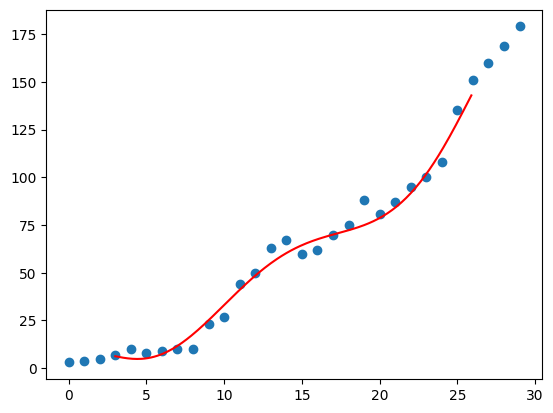

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =1)

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree =7)

x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

PL_model = linear_model.LinearRegression()
PL_model.fit(x_poly_train,y_train)

y_pred = PL_model.predict(x_poly_test)

plt.scatter(x,y)

x_grid = np.arange(min(x_test),max(x_test),0.1).reshape(-1,1)

y_pred_plot = PL_model.predict(poly_reg.transform(x_grid))


plt.plot(x_grid,y_pred_plot,c='r')



avg_Error, avg_bais, avg_var = bias_variance_decomp(MV_model, x_poly_train,y_train, x_poly_test, y_test, loss='mse', random_seed = 1)

print(' * '*10, 'Degree = ',i,' * '*10)
print('Error MSE = ',avg_Error )
print('Error bais = ',avg_bais )
print('Error variance = ',avg_var )


In [ ]:
# # degree 1
# mean_squared_error =  192.28116178469907
# mean_absolute_error =  12.055335558027439
# # degree 2
# mean_squared_error =  72.4863827533238
# mean_absolute_error =  6.5956708512103335
# # degree 3
# mean_squared_error =  67.35662210768811
# mean_absolute_error =  6.686107410421417
# # degree 4
# mean_squared_error =  44.57385607131536
# mean_absolute_error =  5.681381947516987
# # degree 5
# mean_squared_error =  43.38942078712675
# mean_absolute_error =  5.617699955644203
# # degree 6
# mean_squared_error =  19.6191381927033
# mean_absolute_error =  3.5872013838564416
# # degree 10
# mean_squared_error =  15.486536768808568
# mean_absolute_error =  3.1454796812517625
# # degree 11
# mean_squared_error =  11.28377192605484
# mean_absolute_error =  2.694481594960586
# # degree 12
# mean_squared_error =  13.624760053009021
# mean_absolute_error =  3.0406869939922267
